### L1 Regularization

In [1]:
from sklearn.datasets import make_moons

# Create dataset in shape of 2 half moons interleaving each other, useful for binary classification

x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7)

In [3]:
from keras.models import Sequential
from keras.layers import Dense

# Sequential model with 1 input layer with 500 neurons with relu activation and output with sigmoid
# Loss function as binary crossentropy and optimizer adam = mini batch
# Dense = all neurons connected to all neurons of previous layer

model = Sequential()

model.add(Dense(500, input_dim=2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")

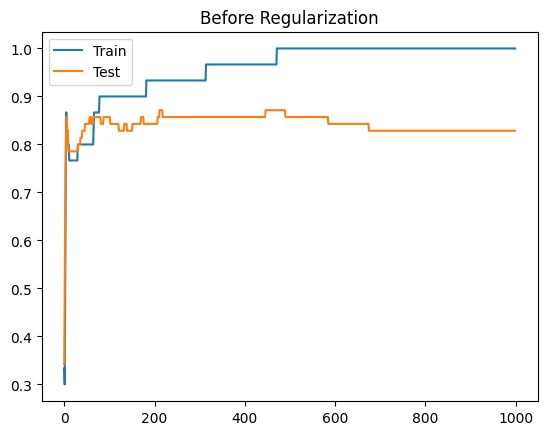

In [4]:
import matplotlib.pyplot as plt

# Fit the model with 1000 epochs which returns history containing accuracy and val_accuracy for each epoch

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, verbose=0)

plt.title("Before Regularization")
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.legend()

In [5]:
from keras.regularizers import l1

l1_model = Sequential()
l1_model.add(Dense(500, input_dim=2, activation="relu", kernel_regularizer=l1(0.002))) # l2 for L2 Regularization
l1_model.add(Dense(1, activation="sigmoid"))

l1_model.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")

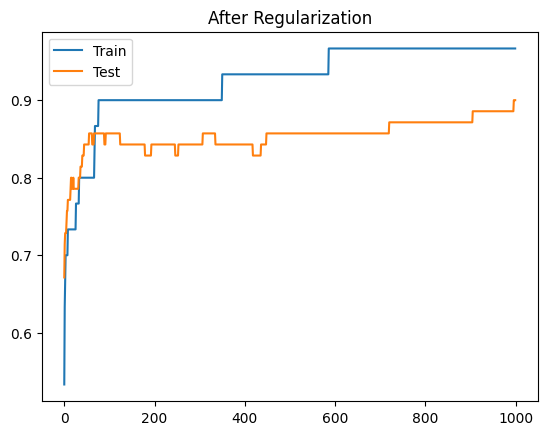

In [6]:
history = l1_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, verbose=0)

plt.title("After Regularization")
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.legend()